In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [103]:
def load_data(path):
    df = pd.read_csv(path)
    print(df.head())
    print(df.dtypes)
    train,test=train_test_split(df,test_size=0.2,random_state=42)
    
    return train,test

In [104]:
path='/Users/rianrachmanto/pypro/data/formated_esp_data.csv'
train,test = load_data(path)

  Well_ID                 Date  Frequency     Voltage  Ampere  \
0     BC1  2023-01-01 00:00:00       60.0  432.299988    60.0   
1     BC1  2023-01-01 00:00:00       60.0  432.299988    60.0   
2     BC1  2023-01-01 01:00:00       60.0  434.799988    60.0   
3     BC1  2023-01-01 01:00:00       60.0  434.799988    60.0   
4     BC1  2023-01-01 02:00:00       60.0  431.899994    60.0   

   Pressure_Discharge  Pressure_Intake  Temp_Intake  Temp_Motor  Vibration_X  \
0                 NaN              NaN          NaN         NaN          NaN   
1                 NaN              NaN          NaN         NaN          NaN   
2                 NaN              NaN          NaN         NaN          NaN   
3                 NaN              NaN          NaN         NaN          NaN   
4                 NaN              NaN          NaN         NaN          NaN   

   Vibration_Y  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
Well_ID                obj

In [105]:
def eda(train):
    print('Train data shape',train.shape)
    print('Number of Missing Values',train.isna().sum())
    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge',
                        'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
    #plotting histogram for numeric columns, one plot for each column
    for col in numeric_columns:
        plt.figure()
        sns.histplot(train[col],kde=True)
        plt.title(col)
        plt.show()
    #plotting boxplot for numeric columns, one plot for each column
    for col in numeric_columns:
        plt.figure()
        sns.boxplot(train[col])
        plt.title(col)
        plt.show()

Train data shape (173844, 11)
Number of Missing Values Well_ID                   0
Date                      0
Frequency             74394
Voltage               76331
Ampere                74394
Pressure_Discharge    40666
Pressure_Intake       40666
Temp_Intake           40666
Temp_Motor            40666
Vibration_X           55251
Vibration_Y           77120
dtype: int64


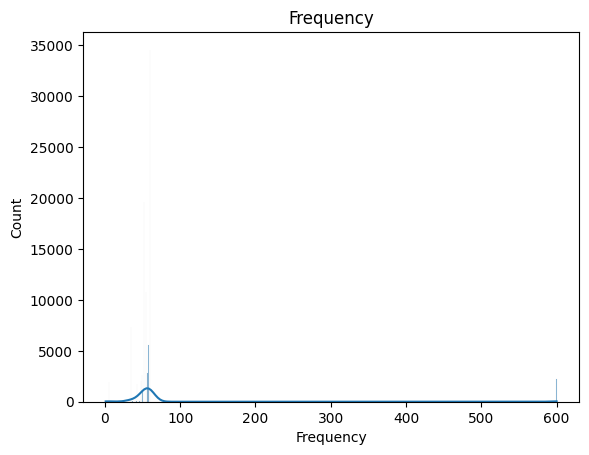

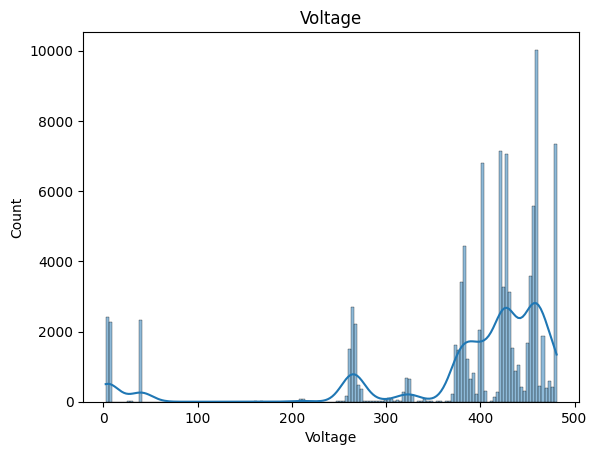

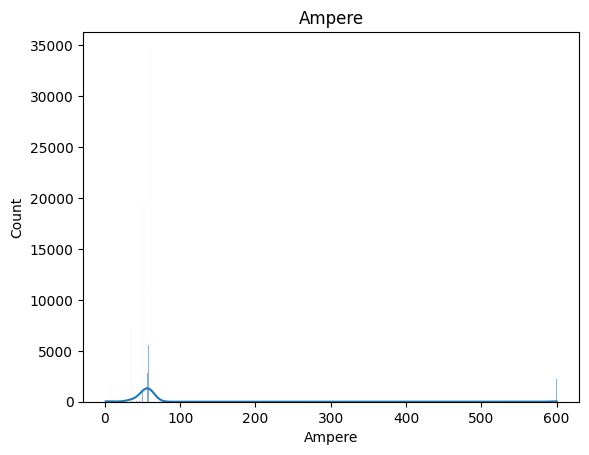

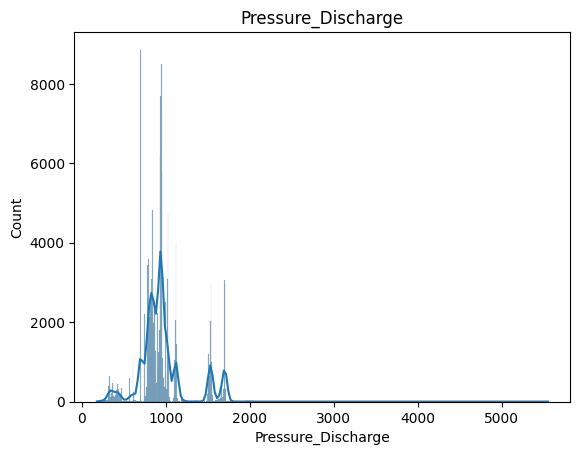

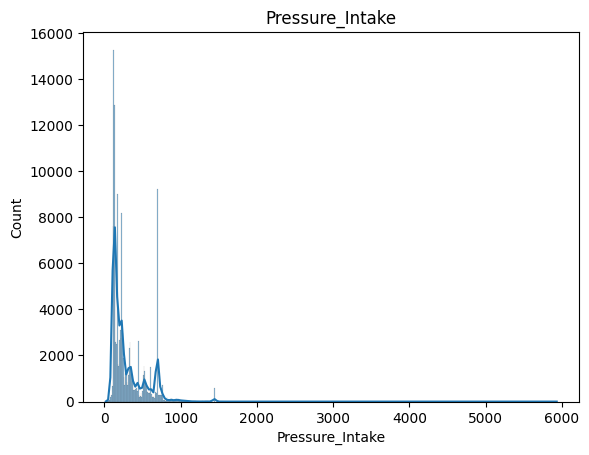

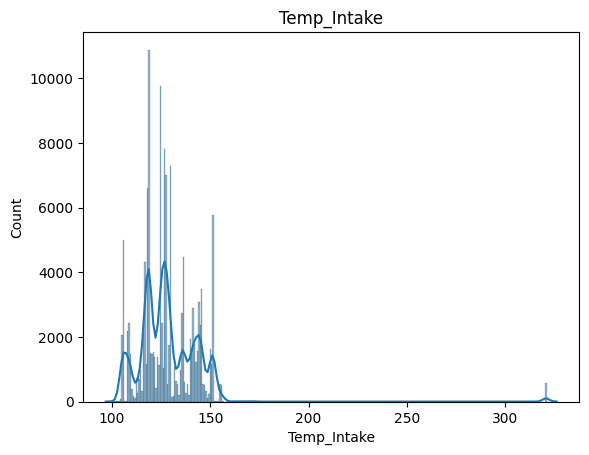

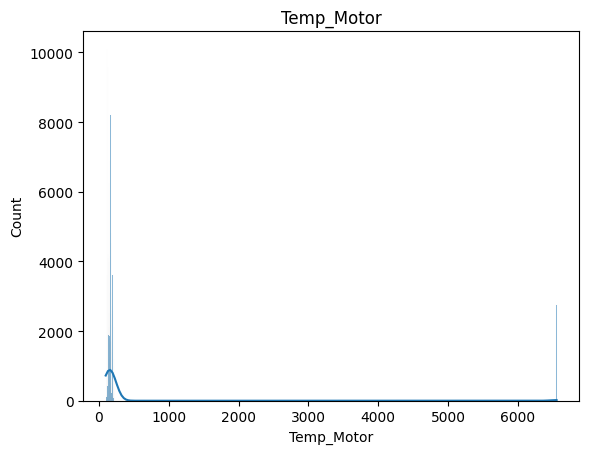

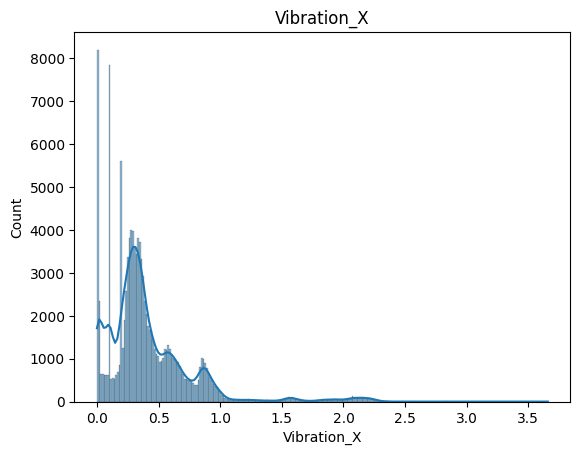

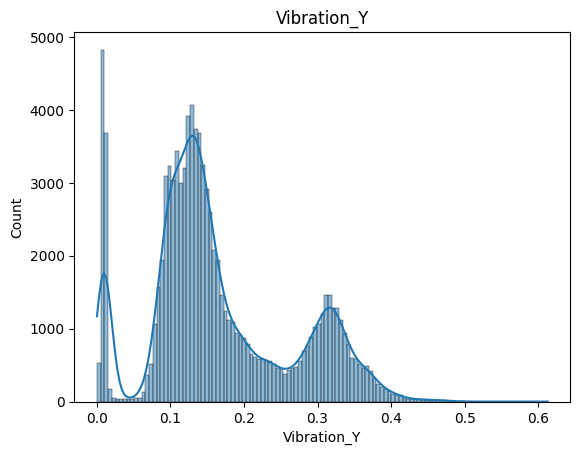

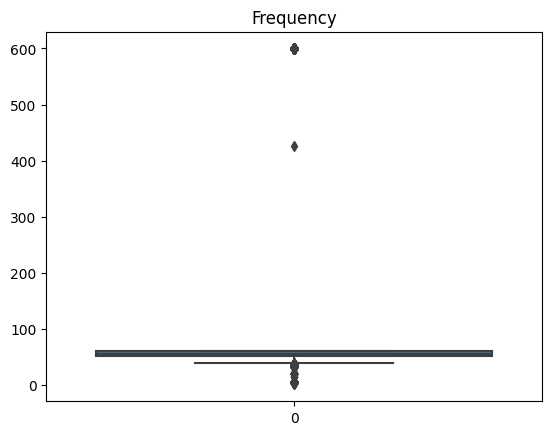

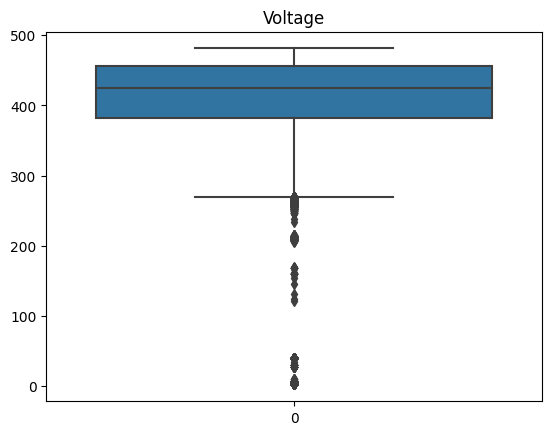

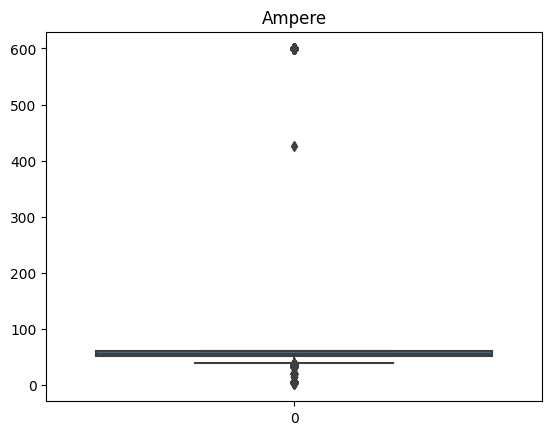

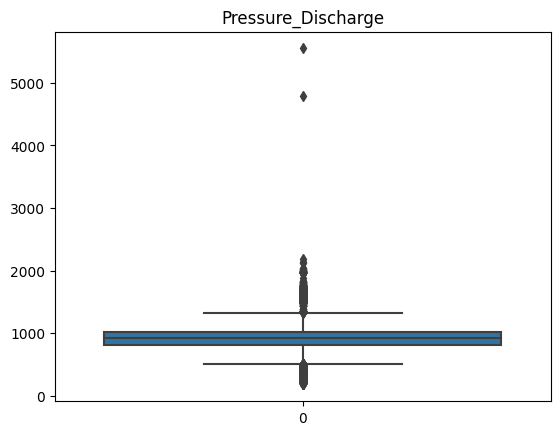

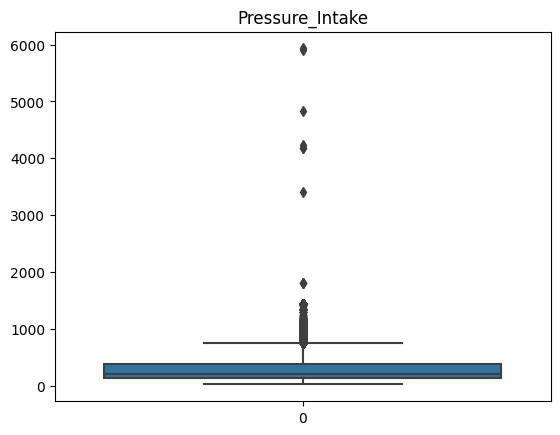

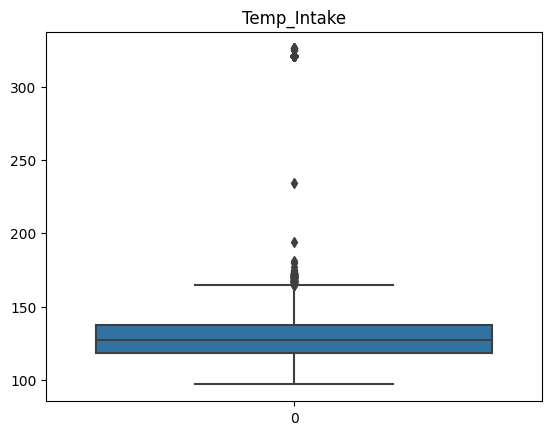

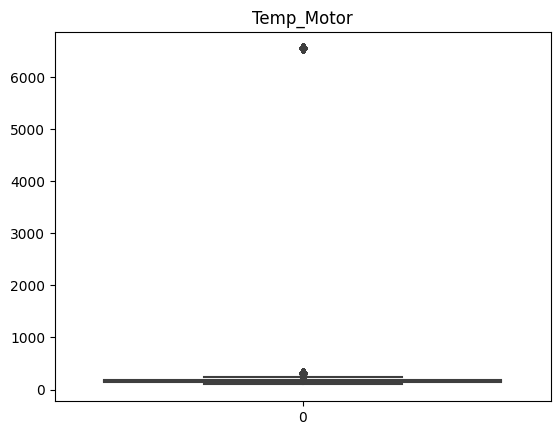

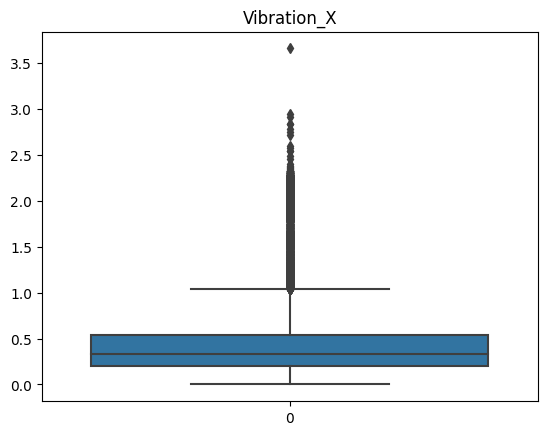

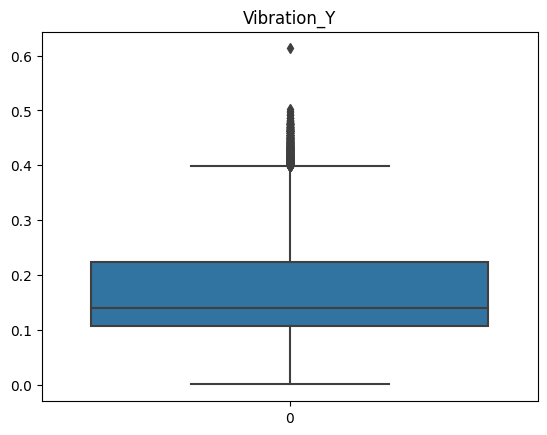

In [106]:
eda(train)

In [107]:
class data_cleaning():
    def __init__(self,train):
        self.train=train
    def clean_train(self):
        #fillna with median and mean method
        #mean_col
        mean_col=['Frequency','Ampere','Pressure_Discharge',
                  'Temp_Intake']
        median_col=['Voltage','Pressure_Intake','Temp_Motor','Vibration_X','Vibration_Y']
        for col in mean_col:
            self.train[col].fillna(self.train[col].mean(),inplace=True)
        for col in median_col:
            self.train[col].fillna(self.train[col].median(),inplace=True)
        # handle outliers with IQR method
        numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge',
                        'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
        for col in numeric_columns:
            Q1 = self.train[col].quantile(0.25)
            Q3 = self.train[col].quantile(0.75)
            IQR = Q3 - Q1
            self.train = self.train[(self.train[col] >= (Q1 - 1.5 * IQR)) & (self.train[col] <= (Q3 + 1.5 * IQR))]
            print('Train data shape after handling outliers',self.train.shape)
        return self.train
    
    def clean_test(self,test):
        #fillna with median and mean method
        #mean_col
        mean_col=['Frequency','Ampere','Pressure_Discharge',
                  'Temp_Intake']
        median_col=['Voltage','Pressure_Intake','Temp_Motor','Vibration_X','Vibration_Y']
        for col in mean_col:
            test[col].fillna(test[col].mean(),inplace=True)
        for col in median_col:
            test[col].fillna(test[col].median(),inplace=True)
        return test

In [108]:
#cleaning train and test data
clean_data=data_cleaning(train)
train=clean_data.clean_train()
test=clean_data.clean_test(test)
print(train.isna().sum())
print(test.isna().sum())

Train data shape after handling outliers (161802, 11)
Train data shape after handling outliers (95244, 11)
Train data shape after handling outliers (74362, 11)
Train data shape after handling outliers (57175, 11)
Train data shape after handling outliers (47689, 11)
Train data shape after handling outliers (47686, 11)
Train data shape after handling outliers (45063, 11)
Train data shape after handling outliers (42337, 11)
Train data shape after handling outliers (42332, 11)
Well_ID               0
Date                  0
Frequency             0
Voltage               0
Ampere                0
Pressure_Discharge    0
Pressure_Intake       0
Temp_Intake           0
Temp_Motor            0
Vibration_X           0
Vibration_Y           0
dtype: int64
Well_ID               0
Date                  0
Frequency             0
Voltage               0
Ampere                0
Pressure_Discharge    0
Pressure_Intake       0
Temp_Intake           0
Temp_Motor            0
Vibration_X           0
Vibra

In [109]:
def preprocess (train):
    numeric_columns=['Frequency', 'Voltage', 'Ampere', 'Pressure_Discharge',
                        'Pressure_Intake', 'Temp_Intake', 'Temp_Motor', 'Vibration_X', 'Vibration_Y']
        #standardize the data
    scaler=StandardScaler()
    train_scaled=scaler.fit_transform(train[numeric_columns])
    train_scaled=pd.DataFrame(train_scaled,columns=numeric_columns)
    return train_scaled

In [110]:
train_scaled=preprocess(train)

In [111]:
def apply_pca(train_scaled, feature_names, visualize=False):
    # Apply PCA with 3 components
    pca = PCA(n_components=3)
    principalComponents = pca.fit_transform(train_scaled)
    principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
    print('Explained Variance Ratio:', pca.explained_variance_ratio_)
    
    # Extract and display loadings
    loadings = pca.components_.T
    loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=feature_names)
    print("Loadings:\n", loadings_df)
    
    if visualize:
        # Visualization: PCA Biplot for PC1 and PC2
        plt.figure(figsize=(10, 7))
        plt.scatter(principalDf['PC1'], principalDf['PC2'], alpha=0.3)  # Plotting data points
        
        # Adding feature vectors for PC1 and PC2
        for i, v in enumerate(loadings):
            plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color='red')
            plt.text(v[0]*1.2, v[1]*1.2, feature_names[i], color='black')
        
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("PCA Biplot with Loadings (PC1 vs PC2)")
        plt.grid(True)
        plt.axis('equal')  # Equal scaling for both axes
        plt.show()
    
    return principalDf

# Usage example, assuming 'data_scaled' is your standardized data and 'feature_names' are column names
# train_scaled = scaler.fit_transform(data)  # Assuming the data has already been scaled
# apply_pca(train_scaled, data.columns, visualize=True)


Explained Variance Ratio: [0.29787603 0.23700829 0.16498701]
Loadings:
                              PC1       PC2           PC3
Frequency          -0.000000e+00 -0.000000  0.000000e+00
Voltage             4.309673e-03 -0.008196 -7.098075e-02
Ampere              5.551115e-17 -0.000000  1.387779e-17
Pressure_Discharge -4.338125e-01 -0.335185 -4.553347e-01
Pressure_Intake    -1.294095e-01  0.052218  7.496286e-01
Temp_Intake        -2.124145e-01 -0.702578  7.830205e-03
Temp_Motor          1.509769e-01 -0.577166  4.132311e-01
Vibration_X         5.557088e-01 -0.192932 -2.282226e-01
Vibration_Y         6.467728e-01 -0.144564 -5.274610e-02


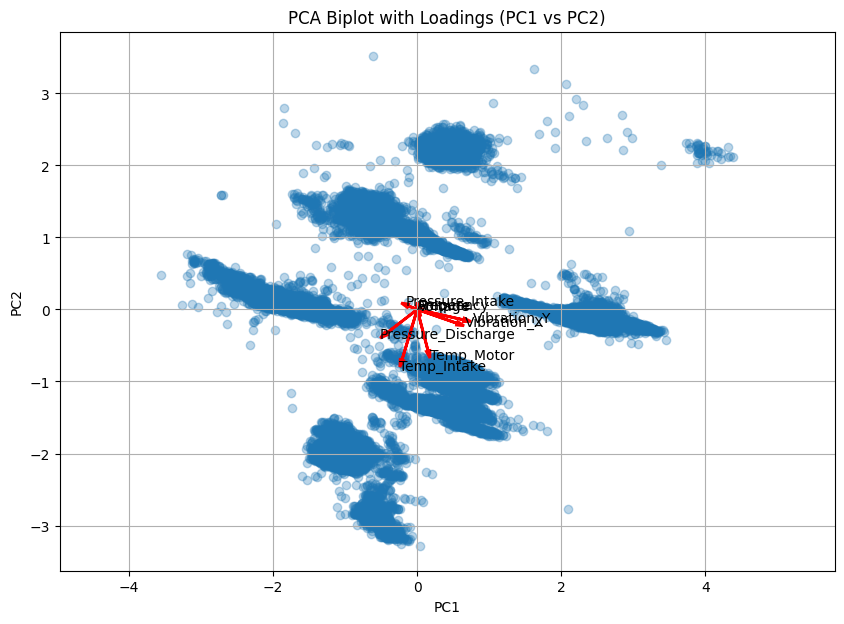

In [112]:
principalDF=apply_pca(train_scaled,train_scaled.columns,visualize=True)

In [113]:
# Assuming principalComponents is your PCA result with the necessary components
def make_cluster(principalDF):
    # Assuming principalDF is a DataFrame with PCA results
    kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust the number of clusters as necessary
    clusters = kmeans.fit_predict(principalDF[['PC1', 'PC2', 'PC3']])  # Use all available principal components

    # Plot the clusters
    plt.scatter(principalDF['PC1'], principalDF['PC2'], c=clusters, cmap='viridis')  # Plot based on PC1 and PC2 for visualization
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)  # Cluster centers
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Clusters')
    plt.show()

    # Return the DataFrame with clusters
    principalDF['cluster'] = clusters
    return principalDF

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


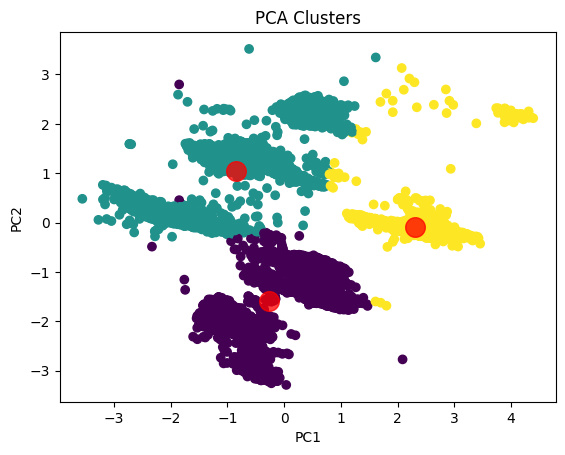

In [114]:
principalDF=make_cluster(principalDF)

In [115]:
print(principalDF)

            PC1       PC2       PC3  cluster
0      1.762749 -0.003404 -0.149530        2
1     -0.995095 -2.112288  0.193488        0
2      2.111903 -0.077065 -0.410914        2
3     -1.546685  0.017509 -1.886258        1
4      2.314529 -0.075181 -0.685184        2
...         ...       ...       ...      ...
42327  0.264431 -1.386785  0.151687        0
42328  0.405422 -0.871176  0.457842        0
42329 -0.188598 -1.276899  0.324785        0
42330  0.050835  1.025497 -0.918204        1
42331  0.634531  2.278251  1.478974        1

[42332 rows x 4 columns]
